In [2]:
import numpy
from matplotlib import pyplot

In [3]:
def ei(x):
    return numpy.exp(1.0j*x)
pi = numpy.pi

# These are the bloch vectors
eigx1 = numpy.asarray([ei(-pi/4), 1.0j, ei(pi/4), 1])
eigx1 = eigx1 / numpy.linalg.norm(eigx1)
eigx2 = numpy.conj(eigx1)

Using GL:

$\vec{k}_\pm = \pm (\frac{\pi}{2}, -\frac{\pi}{2})$

$\phi^{(\pm)} = e^{\pm i \theta} \vert \phi \vert$

$f = \sum_j a_j \vert \phi \vert^{2j} + b \mbox{cos}(8 \theta) \vert \phi \vert^8$

$\vec{\psi}_a(\vec{r}) = e^{i \vec{k}_+ \cdot \vec{r}} \phi^{(+)} \vec{\chi}^{(+)}_a \sigma_{r,a}^{(z)} + e^{i \vec{k}_- \cdot \vec{r}} \phi^{(-)} \vec{\chi}^{(-)}_a \sigma_{r,a}^{(z)}$

$\vec{\psi}_a(\vec{r}) = \vert \phi \vert \left(e^{i (\vec{k}_+ \cdot \vec{r} + \theta)} \vec{\chi}^{(+)}_a + e^{i (\vec{k}_- \cdot \vec{r} - \theta)} \vec{\chi}^{(-)}_a \right)\sigma_{r,a}^{(z)}$

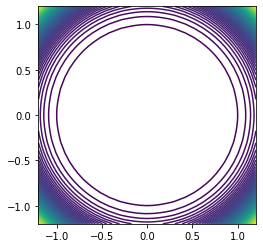

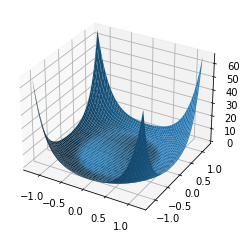

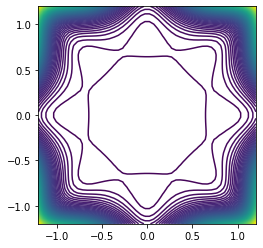

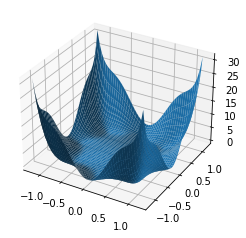

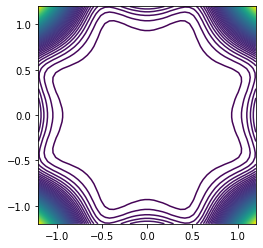

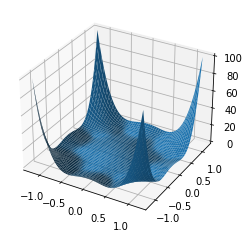

In [42]:
xs = numpy.linspace(-1.2,1.2,50)
ys = numpy.linspace(-1.2,1.2,50)
X, Y = numpy.meshgrid(xs, ys)
phi2 = X**2 + Y**2
theta = numpy.angle(X + 1.0j*Y)

def f(a, b):
    acc = 0.0
    for i in range(len(a)):
        acc += a[i]*(phi2**(i + 1))
    return acc + b*numpy.cos(8*theta)*(phi2**4)

fe = f([-1.0, 0.0, 0.0, 1.0], 0.0)
fig, ax = pyplot.subplots()
ax.contour(X, Y, fe, 100)
ax.set_aspect(1)
pyplot.show()

fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fe)
pyplot.show()

fe = f([-1.0, 0.0, 0.0, 1.0], -0.5)
fig, ax = pyplot.subplots()
ax.contour(X, Y, fe, 100)
ax.set_aspect(1)
pyplot.show()

fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fe)
pyplot.show()

fe = f([-1.0, 0.0, 0.0, 1.0], 0.5)
fig, ax = pyplot.subplots()
ax.contour(X, Y, fe, 100)
ax.set_aspect(1)
pyplot.show()

fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fe)
pyplot.show()

In [32]:
def draw_for_func(f, xsidelen=8, ysidelen=8, ax=None):
    wf_dirs = [
        (0.5, 0.5),
        (0.5, -0.5),
        (-0.5, -0.5),
        (-0.5, 0.5)
    ]
    if ax == None:
        fig, ax = pyplot.subplots()
    for x in range(xsidelen):
        for y in range(ysidelen):
            wf = numpy.abs(f(x, y))
            for p, (dx, dy) in zip(wf, wf_dirs):
                ax.plot([x, x+dx], [y, y+dy], c='r', alpha=p)
    ax.set_xticks(range(xsidelen))
    ax.set_yticks(range(ysidelen))
    ax.grid(which='major', alpha=0.5)

def z_expected_for_pos_theta(x, y, theta, phi_abs=1.0):
    # Uncomment this if you want, it produces the same result.
    # lhs = ei(-theta)*ei(-pi/2 * (x - y))*eigx1
    # rhs = ei(theta)*ei(pi/2 * (x - y))*eigx2
    # return phi_abs*(lhs + rhs)

    # This is just phi_abs*(lhs + rhs)
    cos_version = numpy.cos(theta - pi/2 * (x - y) + numpy.angle(eigx1))
    return cos_version*phi_abs
    
def dimer_probs_for_pos_theta(x, y, theta, phi_abs=1.0):
    z_expected = z_expected_for_pos_theta(x, y, theta, phi_abs=phi_abs)
    # Dimers from j<sz><sz>
    dimer_expected = -z_expected * numpy.roll(z_expected, -1, axis=0) * [-1, 1, 1, 1]
    return (1+dimer_expected)/2.0
    
def draw_for_theta(theta, ax=None):
    def dimer_probs_for_pos(x,y):
        return dimer_probs_for_pos_theta(x, y, theta)
    draw_for_func(dimer_probs_for_pos, ax=ax)
    

## $\theta = \frac{n \pi}{4}$

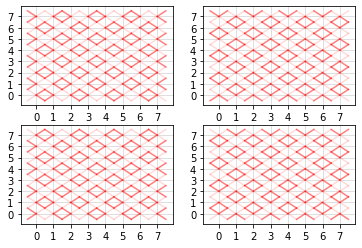

In [33]:
fig, axes = pyplot.subplots(2,2)
for i, ax in enumerate(axes.flatten()):
    draw_for_theta(i*pi/4, ax=ax)
pyplot.savefig('plaquettes.png')
pyplot.show()
pyplot.close()

## $\theta = \frac{n \pi}{2} + \frac{\pi}{8}$

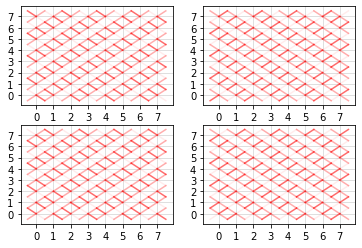

In [34]:
fig, axes = pyplot.subplots(2,2)
for i, ax in enumerate(axes.flatten()):
    draw_for_theta(i*pi/4 + pi/8, ax=ax)
pyplot.savefig('columnars.png')
pyplot.show()
pyplot.close()

### Playing around with making order parameters for columnar/plaquette phases

try giving each unit cell complex number: $e^{i \pi \theta}$ with $\theta \in \{0^\circ, 90^\circ, 180^\circ, 240^\circ\}$ the direction of the dimer.

In [13]:
def fft2(data):
    fft_data = numpy.fft.fft2(data, norm='ortho')
#     fft_data = numpy.roll(fft_data, shift=fft_data.shape[0]//2, axis=0)
#     fft_data = numpy.roll(fft_data, shift=fft_data.shape[1]//2, axis=1)
    return fft_data

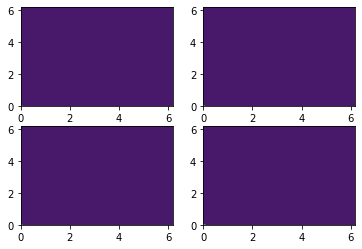

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len = 64
xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)
KX, KY = 2*X*pi/float(side_len), 2*Y*pi/float(side_len)

staggered = numpy.ones((side_len, side_len))*1.0
fft_staggered = fft2(staggered)
ax1.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = numpy.ones((side_len, side_len))*1.0j
fft_staggered = fft2(staggered)
ax2.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = -numpy.ones((side_len, side_len))*1.0
fft_staggered = fft2(staggered)
ax3.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = -numpy.ones((side_len, side_len))*1.0j
fft_staggered = fft2(staggered)
ax4.contourf(KX, KY, numpy.abs(fft_staggered))

pyplot.show()

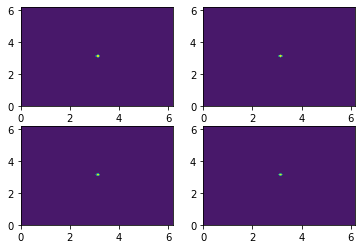

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len=64
xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)
KX, KY = 2*X*pi/float(side_len), 2*Y*pi/float(side_len)

columnar = ((X + Y)%2) - ((X + Y + 1)%2)
fft_columnar = fft2(columnar)
ax1.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = ((X + Y)%2)*1.0j - ((X + Y + 1)%2)*1.0j
fft_columnar = fft2(columnar)
ax2.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = -((X + Y)%2) + ((X + Y + 1)%2)
fft_columnar = fft2(columnar)
ax3.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = -((X + Y)%2)*1.0j + ((X + Y + 1)%2)*1.0j
fft_columnar = fft2(columnar)
ax4.contourf(KX, KY, numpy.abs(fft_columnar))

pyplot.show()

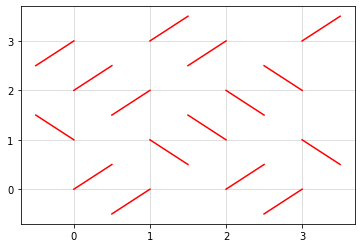

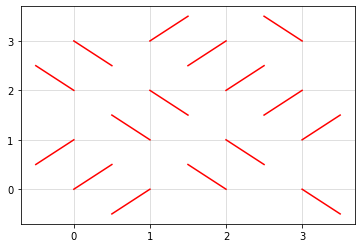

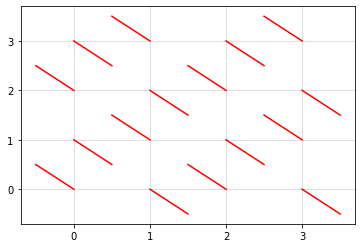

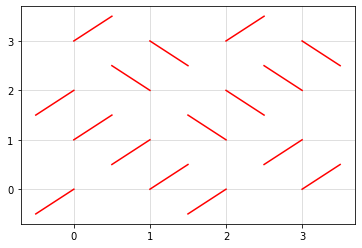

In [16]:
def mock_rand(maxint, size=None):
    assert maxint == 2
    xs = numpy.arange(size[1])
    ys = numpy.arange(size[0])
    X, Y = numpy.meshgrid(xs, ys)
    choices =  (X + Y) % 2
    print(choices)
    return numpy.zeros(size)+1
    return choices

def plaquette(xs, ys, vert=False, rand_fn=numpy.random.randint):
    X, Y = numpy.meshgrid(xs, ys)
    if vert:
        rand_choices = rand_fn(2, size=(len(xs)//2, len(ys)))
        rand_choices = numpy.repeat(rand_choices, 2, axis=0)
        rand_choices_roll = numpy.roll(rand_choices, shift=1, axis=0)
        rand_choices = rand_choices*((X+1)%2) + rand_choices_roll*((X)%2)
        top_bottom = (X+Y+1) % 2
        
        dirs = rand_choices - (1-rand_choices)*1.0j
    else:
        rand_choices = rand_fn(2, size=(len(xs), len(ys)//2))
        rand_choices = numpy.repeat(rand_choices, 2, axis=1)
        rand_choices_roll = numpy.roll(rand_choices, shift=1, axis=1)
        rand_choices = rand_choices*((Y+1)%2) + rand_choices_roll*((Y)%2)
        top_bottom = (X+Y+1) % 2
        
        dirs = rand_choices + (1-rand_choices)*1.0j
    return dirs*top_bottom - dirs*(1-top_bottom)

def draw_plaquette(side_len=4, vert=False, offx=0, offy=0):
    state = plaquette(numpy.arange(side_len)+offx,numpy.arange(side_len)+offy, vert=vert).T
    
    def draw_fn(x, y):
        p = state[x,y]
        if p == 1.0:
            x = 0
        elif p == 1.0j:
            x = 1
        elif p == -1.0:
            x = 2
        elif p == -1.0j:
            x = 3
        v = numpy.zeros((4,))
        v[x] = 1.0
        return v
    draw_for_func(draw_fn, xsidelen=side_len, ysidelen=side_len)

draw_plaquette()
draw_plaquette(vert=True)
draw_plaquette(offy=1)
draw_plaquette(vert=True,offx=1)

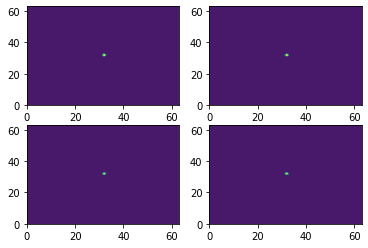

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len = 64

state = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=False).T    
fft_state = fft2(state)
ax1.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len),numpy.arange(side_len)+1, vert=False).T    
fft_state = fft2(state)
ax2.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=True).T
fft_state = fft2(state)
ax3.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len)+1,numpy.arange(side_len), vert=True).T
fft_state = fft2(state)
ax4.contourf(numpy.abs(fft_state))

pyplot.show()

In [18]:
def max_from_abs(data):
    xs = numpy.arange(data.shape[0])
    ys = numpy.arange(data.shape[1])
    X, Y = numpy.meshgrid(xs, ys)
    
    data = data.flatten()
    indx = numpy.argmax(numpy.abs(data))
    
    x = X.flatten()[indx]
    y = Y.flatten()[indx]
    
    return (x,y), data[indx]

side_len = 256

xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)

columnar1 = ((X + Y)%2) - ((X + Y + 1)%2)
columnar2 = ((X + Y)%2)*1.0j - ((X + Y + 1)%2)*1.0j
columnar3 = -((X + Y)%2) + ((X + Y + 1)%2)
columnar4 = -((X + Y)%2)*1.0j + ((X + Y + 1)%2)*1.0j

fft_columnar1 = fft2(columnar1)
fft_columnar2 = fft2(columnar2)
fft_columnar3 = fft2(columnar3)
fft_columnar4 = fft2(columnar4)

print("Columnars:")
columnars = [fft_columnar1,fft_columnar2,fft_columnar3,fft_columnar4]
for d in columnars:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))

Columnars:
(1.0pi,1.0pi)	256.000	1.000pi
(1.0pi,1.0pi)	256.000	-0.500pi
(1.0pi,1.0pi)	256.000	0.000pi
(1.0pi,1.0pi)	256.000	0.500pi


In [19]:
plaquette_state1 = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=False).T    
plaquette_state2 = plaquette(numpy.arange(side_len),numpy.arange(side_len)+1, vert=False).T    
plaquette_state3 = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=True).T    
plaquette_state4 = plaquette(numpy.arange(side_len)+1,numpy.arange(side_len), vert=True).T    

fft_plaquette1 = fft2(plaquette_state1)
fft_plaquette2 = fft2(plaquette_state2)
fft_plaquette3 = fft2(plaquette_state3)
fft_plaquette4 = fft2(plaquette_state4)

print("Plaquettes:")
plaquettes = [fft_plaquette1,fft_plaquette2,fft_plaquette3,fft_plaquette4]
for d in plaquettes:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))


Plaquettes:
(1.0pi,1.0pi)	181.019	0.250pi
(1.0pi,1.0pi)	181.020	-0.751pi
(1.0pi,1.0pi)	181.023	-0.248pi
(1.0pi,1.0pi)	181.022	0.748pi


In [20]:
staggered1 = numpy.ones((side_len, side_len))*1.0
staggered2 = numpy.ones((side_len, side_len))*1.0j
staggered3 = -numpy.ones((side_len, side_len))*1.0
staggered4 = -numpy.ones((side_len, side_len))*1.0j

fft_staggered1 = fft2(staggered1)
fft_staggered2 = fft2(staggered2)
fft_staggered3 = fft2(staggered3)
fft_staggered4 = fft2(staggered4)

print("Staggereds:")
plaquettes = [fft_staggered1,fft_staggered2,fft_staggered3,fft_staggered4]
for d in plaquettes:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))

Staggereds:
(0.0pi,0.0pi)	256.000	0.000pi
(0.0pi,0.0pi)	256.000	0.500pi
(0.0pi,0.0pi)	256.000	1.000pi
(0.0pi,0.0pi)	256.000	-0.500pi
